## Test numpy & matplotlib

In [1]:
import numpy as np
import matplotlib.pyplot as plt

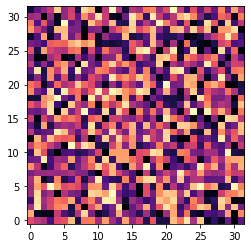

In [2]:
plt.imshow( np.random.rand( 32, 32 ), origin='lower', cmap=plt.get_cmap('magma') );

## Test MPI

In [3]:
import numpy as np
import ipcmagic
import ipyparallel as ipp

In [4]:
%ipcluster start -n 4

  0%|          | 0/4 [00:00<?, ?engine/s]

In [5]:
c = ipp.Client()

In [6]:
c.ids

[0, 1, 2, 3]

In [7]:
%%px
import socket
from mpi4py import MPI

In [8]:
%%px
print("Hello World from rank %s of %s on nid %s" % (MPI.COMM_WORLD.rank,
                                                    MPI.COMM_WORLD.size,
                                                    socket.gethostname()))

[stdout:1] Hello World from rank 2 of 4 on nid nid01949


[stdout:2] Hello World from rank 3 of 4 on nid nid01949


[stdout:3] Hello World from rank 0 of 4 on nid nid01949


[stdout:0] Hello World from rank 1 of 4 on nid nid01949


In [9]:
c.close()
%ipcluster stop

IPCluster stopped.


## Test Cupy

In [10]:
import numpy as np
import cupy as cp
import time

In [11]:
### Numpy and CPU
s = time.time()
x_cpu = np.ones((1000,1000,1000))
e = time.time()
print(e - s)

### CuPy and GPU
s = time.time()
x_gpu = cp.ones((1000,1000,1000))
cp.cuda.Stream.null.synchronize()
e = time.time()
print(e - s)

2.8075478076934814
0.938133955001831


## Test GT4Py

In [12]:
import os
import warnings
import gt4py
from gt4py import gtscript

# The setuptools warning can be ignored!

/users/class151/HPC4WC_venv/lib/python3.9/site-packages/setuptools/distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [13]:
@gtscript.stencil(backend="numpy")
def copy_stencil(in_field: gtscript.Field[float], out_field: gtscript.Field[float]):
    from __gtscript__ import computation, interval, PARALLEL

    with computation(PARALLEL), interval(...):
        out_field = in_field

In [14]:
shape = (2,4,4)
in_storage = gt4py.storage.ones(shape=shape, default_origin=(0,0,0), dtype=float, backend="numpy")
out_storage = gt4py.storage.zeros(shape=shape, default_origin=(0,0,0), dtype=float, backend="numpy")
copy_stencil(in_storage, out_storage)
print(out_storage)

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


## Check installed packages

In [15]:
%%bash
python -m pip list

Package                   Version
------------------------- --------------
aenum                     3.1.0
aiohttp                   3.8.1
aiosignal                 1.2.0
alembic                   1.7.6
anyio                     3.5.0
appdirs                   1.4.4
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
ase                       3.22.1
asttokens                 2.0.5
astunparse                1.6.3
async-generator           1.10
async-lru                 2.0.4
async-timeout             4.0.2
attrs                     23.2.0
Babel                     2.9.1
backcall                  0.2.0
bash_kernel               0.7.2
batchspawner              0.9.0.dev0
beautifulsoup4            4.12.3
black                     22.1.0
bleach                    4.1.0
bokeh                     2.4.2
boltons                   21.0.0
cached-property           1.5.2
certifi                   2021.10.8
certipy                   0.1.3
cffi          